Toyota Youtube videos sentimewnt analysis


1- 2024 Toyota Corolla Hybrid


In [ ]:
import pandas as pd
from textblob import TextBlob

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Path to your CSV file
file_path = "/content/drive/MyDrive/toyotavideo1.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      term  #messages  #instances
0  Corolla         82          97
1   Hybrid         63          81
2   Toyota         48          54
3    civic         33          36
4    Prius         27          38


In [ ]:
# NLTK
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import subprocess
import shlex
import os.path
import sys

# 1- SentiStrength

In [ ]:
# Download SentiStrength JAR file
!wget -O SentiStrengthCom.jar https://www.dropbox.com/scl/fi/c4f3o3rrolr0a52vcbpvj/SentiStrengthCom.jar?rlkey=bn770p704a3vwg6sl46e2xe15&dl=0

--2024-05-01 17:20:58--  https://www.dropbox.com/scl/fi/c4f3o3rrolr0a52vcbpvj/SentiStrengthCom.jar?rlkey=bn770p704a3vwg6sl46e2xe15
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69418e2eab9de1e45c01377be7.dl.dropboxusercontent.com/cd/0/inline/CSHAoCcvDZxE3Ce4T-8_JrjVnQVVU15qAIoFJggLoBMsrAxbn40f0wfMWA5kj_0wo0FjC9rVs75KRhaDJdEfMeHNTwLEnxsEK_VffroPIich5pnRnGnlUOAnGliNzBNTk-A/file# [following]
--2024-05-01 17:20:59--  https://uc69418e2eab9de1e45c01377be7.dl.dropboxusercontent.com/cd/0/inline/CSHAoCcvDZxE3Ce4T-8_JrjVnQVVU15qAIoFJggLoBMsrAxbn40f0wfMWA5kj_0wo0FjC9rVs75KRhaDJdEfMeHNTwLEnxsEK_VffroPIich5pnRnGnlUOAnGliNzBNTk-A/file
Resolving uc69418e2eab9de1e45c01377be7.dl.dropboxusercontent.com (uc69418e2eab9de1e45c01377be7.dl.dropboxusercontent.com)... 162.125.80.15, 2620:100:6035:15::a27d:550f
Connecti

In [ ]:
# Download SentiStrength data file
!wget -O SentStrength_Data_2010.zip https://www.dropbox.com/scl/fi/w0bmy1nw5nkcpuevscuef/SentStrength_Data_2010.zip?rlkey=na9gwfxbrm33wavd8tj7atn5i&dl=0

--2024-05-01 17:21:01--  https://www.dropbox.com/scl/fi/w0bmy1nw5nkcpuevscuef/SentStrength_Data_2010.zip?rlkey=na9gwfxbrm33wavd8tj7atn5i
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf0f3a927156836e099705c4115.dl.dropboxusercontent.com/cd/0/inline/CSG4omjHFOtOYT8cmen6lG2xBfRV-IyP4-eT8TOgQ6XzXKX2JL9MuRtYCPwgJwxF8r6uMUUP6LZB02OUfJsBnQD6QCvl71PVUXCjRmhRA_iUQUZP_8_yk65aQWG-5idldhM/file# [following]
--2024-05-01 17:21:02--  https://ucf0f3a927156836e099705c4115.dl.dropboxusercontent.com/cd/0/inline/CSG4omjHFOtOYT8cmen6lG2xBfRV-IyP4-eT8TOgQ6XzXKX2JL9MuRtYCPwgJwxF8r6uMUUP6LZB02OUfJsBnQD6QCvl71PVUXCjRmhRA_iUQUZP_8_yk65aQWG-5idldhM/file
Resolving ucf0f3a927156836e099705c4115.dl.dropboxusercontent.com (ucf0f3a927156836e099705c4115.dl.dropboxusercontent.com)... 162.125.80.15, 2620:100:6020:15::a27d:400f
Co

In [ ]:
# unzip data file
!unzip SentStrength_Data_2010.zip -d SentiStrengthData

Archive:  SentStrength_Data_2010.zip
replace SentiStrengthData/BoosterWordList.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
SentiStrengthLocation = "SentiStrengthCom.jar"
SentiStrengthLanguageFolder = "SentiStrengthData/"

In [ ]:
if not os.path.isfile(SentiStrengthLocation):
    print("SentiStrength not found at: ", SentiStrengthLocation)
if not os.path.isdir(SentiStrengthLanguageFolder):
    print("SentiStrength data folder not found at: ", SentiStrengthLanguageFolder)

In [ ]:

def sentiment_sentistrength(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder + "'"),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') #Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    stdout_text = stdout_byte.decode("utf-8")  #convert from byte
    stdout_text = stdout_text.rstrip().replace("\t"," ") #remove the tab spacing between the positive and negative ratings. e.g. 1    -5 -> 1 -5
    return(stdout_text.split(' '))

def RateSentiment(sentiString):
    stdout_text = ' '.join(sentiment_sentistrength(sentiString))
    return stdout_text + " " + sentiString

In [ ]:
RateSentiment(data.term[8])

'2 -1 good'

In [ ]:
# Function to rate sentiment
def RateSentiment(text):
    analysis = TextBlob(str(text))
    # return the polarity score for sentiment analysis
    return analysis.sentiment.polarity

# Apply sentiment analysis function to each term in the 'term' column and store results in a new column 'Sentiment'
data['SentiStrength'] = data['term'].apply(RateSentiment)

# Display the first few rows of the DataFrame with the new 'Sentiment' column
print(data.head(20))


                  term  #messages  #instances  SentiStrength
0              Corolla         82          97            0.0
1               Hybrid         63          81            0.0
2               Toyota         48          54            0.0
3                civic         33          36            0.0
4                Prius         27          38            0.0
5                  Awd         24          28            0.0
6                Honda         20          23            0.0
7                 It’s         16          23            0.0
8                 good         16          17            0.7
9                    😂         14          22            0.0
10  @@naveenthemachine         14          14            0.0
11               power         13          15            0.0
12                  hp         12          14            0.0
13                slow         12          14           -0.3
14                 Kia         12          14            0.0
15                 buy  

First most common termns are about the car, neutral, I displayed the first 20 rows as "good" and "slow" are positive and negative terms, we can see the sentiment.

# 2- VADER

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Initialize Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to rate sentiment using Vader
def RateVaderSentiment(text):
    # Perform Vader sentiment analysis
    vs = analyzer.polarity_scores(str(text))
    # Return compound score, which represents overall sentiment
    return vs['compound']

# Apply Vader sentiment analysis function to each term in the 'term' column and store results in a new column 'vader'
data['vader'] = data['term'].apply(RateVaderSentiment)

# Display the first 20 rows of the DataFrame with the new 'vader' column
print(data.head(20))

                  term  #messages  #instances  SentiStrength   vader
0              Corolla         82          97            0.0  0.0000
1               Hybrid         63          81            0.0  0.0000
2               Toyota         48          54            0.0  0.0000
3                civic         33          36            0.0  0.0000
4                Prius         27          38            0.0  0.0000
5                  Awd         24          28            0.0  0.0000
6                Honda         20          23            0.0  0.0000
7                 It’s         16          23            0.0  0.0000
8                 good         16          17            0.7  0.4404
9                    😂         14          22            0.0  0.4404
10  @@naveenthemachine         14          14            0.0  0.0000
11               power         13          15            0.0  0.0000
12                  hp         12          14            0.0  0.0000
13                slow         12 

# 3- TextBlob

In [ ]:
from textblob import TextBlob
# Function to perform sentiment analysis using TextBlob
def RateTextBlobSentiment(text):
    blob = TextBlob(str(text))
    # Return the polarity score for sentiment analysis
    return blob.sentiment.polarity

# Apply TextBlob sentiment analysis function to each term in the 'term' column and store results in a new column 'Blob'
data['Blob'] = data['term'].apply(RateTextBlobSentiment)

# Display the first 20 rows of the DataFrame with the new 'Blob' column
print(data.head(20))


                  term  #messages  #instances  SentiStrength   vader  Blob
0              Corolla         82          97            0.0  0.0000   0.0
1               Hybrid         63          81            0.0  0.0000   0.0
2               Toyota         48          54            0.0  0.0000   0.0
3                civic         33          36            0.0  0.0000   0.0
4                Prius         27          38            0.0  0.0000   0.0
5                  Awd         24          28            0.0  0.0000   0.0
6                Honda         20          23            0.0  0.0000   0.0
7                 It’s         16          23            0.0  0.0000   0.0
8                 good         16          17            0.7  0.4404   0.7
9                    😂         14          22            0.0  0.4404   0.0
10  @@naveenthemachine         14          14            0.0  0.0000   0.0
11               power         13          15            0.0  0.0000   0.0
12                  hp   

# 4- Afinn

In [ ]:
!pip install Afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 915.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=91bd2f4c674cb5bbb9bec19b3e28b7d120e843174d1f7c46d1223b4f3ffc812e
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built Afinn


In [ ]:
# Importing necessary libraries
from afinn import Afinn

# Initialize Afinn sentiment analyzer
afinn = Afinn()

# Function to perform sentiment analysis using Afinn
def RateAfinnSentiment(text):
    # Perform Afinn sentiment analysis
    return afinn.score(str(text))

# Apply Afinn sentiment analysis function to each term in the 'term' column and store results in a new column 'Afinn'
data['Afinn'] = data['term'].apply(RateAfinnSentiment)

# Display the first 20 rows of the DataFrame with the new 'Afinn' column
print(data.head(20))


                  term  #messages  #instances  SentiStrength   vader  Blob  \
0              Corolla         82          97            0.0  0.0000   0.0   
1               Hybrid         63          81            0.0  0.0000   0.0   
2               Toyota         48          54            0.0  0.0000   0.0   
3                civic         33          36            0.0  0.0000   0.0   
4                Prius         27          38            0.0  0.0000   0.0   
5                  Awd         24          28            0.0  0.0000   0.0   
6                Honda         20          23            0.0  0.0000   0.0   
7                 It’s         16          23            0.0  0.0000   0.0   
8                 good         16          17            0.7  0.4404   0.7   
9                    😂         14          22            0.0  0.4404   0.0   
10  @@naveenthemachine         14          14            0.0  0.0000   0.0   
11               power         13          15            0.0  0.

# 5- SentiWordNet

In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

# Ensure that the necessary NLTK corpora are downloaded
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to score the sentiment of a piece of text using SentiWordNet
def get_sentiment(text):
    sentiment_score = 0

    # Tokenize and tag the text with part-of-speech tags
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)

    for word, tag in pos_tags:
        # Convert the part-of-speech tag to one that SentiWordNet understands
        wn_tag = convert_to_wn_tag(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
            continue

        # Get the synsets for the tagged word
        synsets = wn.synsets(word, wn_tag)
        if not synsets:
            continue

        # Get the most common synset
        synset = synsets[0]
        # Get the senti_synset corresponding to the synset
        senti_synset = swn.senti_synset(synset.name())
        sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()

    return sentiment_score

# Function to convert part-of-speech tags to a format recognized by SentiWordNet
def convert_to_wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wn.ADJ
    elif nltk_tag.startswith('V'):
        return wn.VERB
    elif nltk_tag.startswith('N'):
        return wn.NOUN
    elif nltk_tag.startswith('R'):
        return wn.ADV
    else:
        return None

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Function to perform sentiment analysis using SentiWordNet
def RateSentiWordNetSentiment(text):
    # Initialize variables to store positive and negative scores
    pos_score = 0
    neg_score = 0

    # Iterate through each term in the text
    for word in str(text).split():
        # Get synsets for the word
        synsets = wn.synsets(word)

        # Check if synsets are available for the word
        if synsets:
            # Consider only the first synset for simplicity
            synset = synsets[0]

            # Get the positive and negative scores from SentiWordNet if available
            senti_synset = swn.senti_synset(synset.name())
            pos_score += senti_synset.pos_score()
            neg_score += senti_synset.neg_score()

    # Return the sum of positive and negative scores
    return pos_score - neg_score

# Apply SentiWordNet sentiment analysis function to each term in the 'term' column and store results in a new column 'sentiwordnet'
data['sentiwordnet'] = data['term'].apply(RateSentiWordNetSentiment)

# Display the first 20 rows of the DataFrame with the new 'sentiwordnet' column
print(data.head(20))

                  term  #messages  #instances  SentiStrength   vader  Blob  \
0              Corolla         82          97            0.0  0.0000   0.0   
1               Hybrid         63          81            0.0  0.0000   0.0   
2               Toyota         48          54            0.0  0.0000   0.0   
3                civic         33          36            0.0  0.0000   0.0   
4                Prius         27          38            0.0  0.0000   0.0   
5                  Awd         24          28            0.0  0.0000   0.0   
6                Honda         20          23            0.0  0.0000   0.0   
7                 It’s         16          23            0.0  0.0000   0.0   
8                 good         16          17            0.7  0.4404   0.7   
9                    😂         14          22            0.0  0.4404   0.0   
10  @@naveenthemachine         14          14            0.0  0.0000   0.0   
11               power         13          15            0.0  0.

In [ ]:
# Calculate overall sentiment by taking the average of sentiment scores from all columns
data['overall_sentiment'] = data[['SentiStrength', 'vader', 'Blob', 'Afinn', 'sentiwordnet']].mean(axis=1)

# Display the first 20 rows of the DataFrame with the new 'overall_sentiment' column
print(data.head(20))


                  term  #messages  #instances  SentiStrength   vader  Blob  \
0              Corolla         82          97            0.0  0.0000   0.0   
1               Hybrid         63          81            0.0  0.0000   0.0   
2               Toyota         48          54            0.0  0.0000   0.0   
3                civic         33          36            0.0  0.0000   0.0   
4                Prius         27          38            0.0  0.0000   0.0   
5                  Awd         24          28            0.0  0.0000   0.0   
6                Honda         20          23            0.0  0.0000   0.0   
7                 It’s         16          23            0.0  0.0000   0.0   
8                 good         16          17            0.7  0.4404   0.7   
9                    😂         14          22            0.0  0.4404   0.0   
10  @@naveenthemachine         14          14            0.0  0.0000   0.0   
11               power         13          15            0.0  0.

In [ ]:
# Calculate the mean of all scores in the 'overall_sentiment' column
overall_mean_sentiment = data['overall_sentiment'].mean()

# Display the mean of all scores in the 'overall_sentiment' column
print("Overall Mean Sentiment Score:", overall_mean_sentiment)


Overall Mean Sentiment Score: 0.0052750053343683925


In [ ]:
# Create a list called "negative_words"
negative_words = data[data['overall_sentiment'] < 0]['term'].tolist()

# Display the list of "negative_words"
print("Negative Words List:")
print(negative_words)


Negative Words List:
['slow', 'Kia', 'boring', 'cheaper', 'low', 'compared', 'option', 'expensive', 'pay', 'bad', 'bit', 'question', 'lower', 'half', 'previous', 'Wrong', 'screams', 'CRAZY', 'base', 'guess', 'outdated', 'Imagine', 'long', 'ugly', 'slightly', 'late', 'roads', 'everyday', 'smaller', 'doubt', 'hard', 'trouble', 'pathetic', 'sec', 'Damn', 'dead', 'game', 'past', 'poor', 'average', 'Missed', 'red', 'Stupid', 'Problem', 'useless', 'finish', 'buck', 'limited', 'sad', 'shocking', 'priority', 'invalidate', 'Smh', 'garish', 'difference', 'weak', 'nuts', 'gripe', 'downgraded', 'Chevy', 'whopping', 'steal', 'arguing', 'worst', 'WTF', 'complaints', 'failures', 'bloody', 'creature', 'shit', 'forgot', 'unfortunate', 'morons', 'defects', 'naysayers', 'Gimmick', 'died', 'spent', 'refuses', 'Strange', 'cluster', 'worse', 'lots', 'endless', 'atrocious', 'confusing', 'mash', 'maw', 'black', 'sharp', 'dark', 'typical', 'forget', 'small', 'juvenile', 'Soft', 'CAD', 'giant', 'refuse', 'aggre

In [ ]:
# Create a list called "positive_words"
positive_words = data[data['overall_sentiment'] > 0]['term'].tolist()

# Display the list of "negative_words"
print("Positive Words List:")
print(positive_words)

Positive Words List:
['good', '😂', 'buy', 'reliable', 'quality', 'Yeah', 'performance', 'reliability', 'Makes', 'lol', 'love', 'thinking', 'perfect', 'superior', 'make', 'maintenance', 'pretty', 'competitive', 'fast', 'prefer', 'feel', 'fit', 'Luxury', 'fun', 'high', 'top', 'understand', 'efficiency', 'great', 'Live', 'Agreed', 'worth', 'agree', 'overpriced', '😅', 'find', 'care', 'full', 'Lmao', 'Wow', '😊', 'big', 'Forte', 'luxurious', 'solid', 'recent', 'super', 'higher', 'major', 'increased', 'feels', 'mind', 'efficient', 'comfortable', 'enthusiasts', 'issues', 'wise', 'lts', 'sporty', 'cheap', 'loyal', 'nicer', '❤', 'honest', 'significantly', 'modern', 'grand', 'completely', 'idea', 'totally', 'real', 'excellent', 'date', 'funny', 'defensive', 'reach', 'called', 'cares', 'resolved', 'won', 'strength', 'Comical', 'roughly', 'compare', 'SAVE', 'considered', 'top\u200b@naveenthemachine', 'training', 'trucks', 'dash', 'slap', 'kiss', 'goodness', 'chances', 'WD', 'light', 'wishing', 'opp

In [ ]:
print(len(negative_words))

193


In [ ]:
print(len(positive_words))

212


<ipython-input-56-dd14038472f7>:18: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  plt.tight_layout()
<ipython-input-56-dd14038472f7>:18: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  plt.tight_layout()
<ipython-input-56-dd14038472f7>:18: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  plt.tight_layout()
<ipython-input-56-dd14038472f7>:18: UserWarning: Glyph 128034 (\N{TURTLE}) missing from current font.
  plt.tight_layout()
<ipython-input-56-dd14038472f7>:18: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  plt.tight_layout()
<ipython-input-56-dd14038472f7>:18: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
<ipython-input-56-dd14038472f7>:18: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  plt.tight_layout()
<ipython-input-56-dd14038472f7>:18: UserWarning: Glyph 129393 (\N{YAW

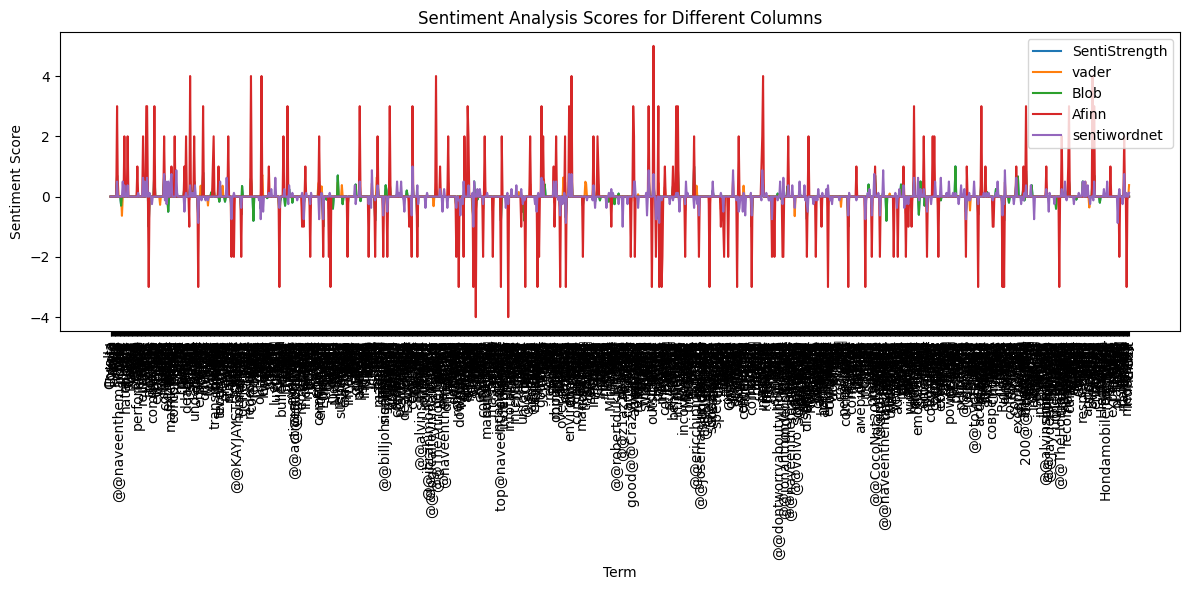

In [ ]:
import matplotlib.pyplot as plt

# Extracting 'term' column and sentiment columns
terms = data['term']
sentiment_columns = ['SentiStrength', 'vader', 'Blob', 'Afinn', 'sentiwordnet']

# Plotting line graph for each sentiment column
plt.figure(figsize=(12, 6))
for column in sentiment_columns:
    plt.plot(terms, data[column], label=column)

# Adding labels and title
plt.xlabel('Term')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Scores for Different Columns')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-58-4b36eb216f7e>:15: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  plt.tight_layout()
<ipython-input-58-4b36eb216f7e>:15: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  plt.tight_layout()
<ipython-input-58-4b36eb216f7e>:15: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  plt.tight_layout()
<ipython-input-58-4b36eb216f7e>:15: UserWarning: Glyph 128034 (\N{TURTLE}) missing from current font.
  plt.tight_layout()
<ipython-input-58-4b36eb216f7e>:15: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  plt.tight_layout()
<ipython-input-58-4b36eb216f7e>:15: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
<ipython-input-58-4b36eb216f7e>:15: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  plt.tight_layout()
<ipython-input-58-4b36eb216f7e>:15: UserWarning: Glyph 129393 (\N{YAW

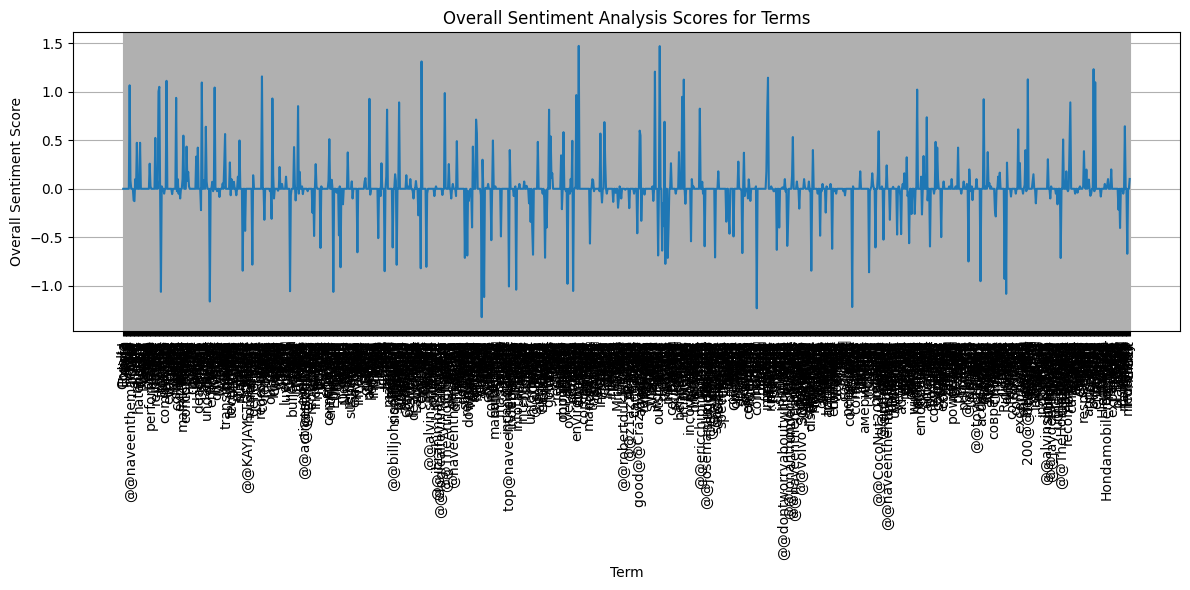

In [ ]:
import matplotlib.pyplot as plt

# Plotting 'term' vs 'overall_sentiment' as a line graph
plt.figure(figsize=(12, 6))
plt.plot(data['term'], data['overall_sentiment'], linestyle='-')

# Adding labels and title
plt.xlabel('Term')
plt.ylabel('Overall Sentiment Score')
plt.title('Overall Sentiment Analysis Scores for Terms')
plt.xticks(rotation=90)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Save DataFrame to CSV file
data.to_csv('sentiment_analysis_results.csv', index=False)  # Set index=False to avoid saving the DataFrame index

# Save DataFrame to Excel file
data.to_excel('sentiment_analysis_results.xlsx', index=False)  # Set index=False to avoid saving the DataFrame index


In [ ]:
%ls


drive/        sentiment_analysis_results.csv   SentiStrengthCom.jar  SentStrength_Data_2010.zip
sample_data/  sentiment_analysis_results.xlsx  SentiStrengthData/


In [ ]:
from google.colab import files

# Save DataFrame to CSV file
data.to_csv('sentiment_analysis_results.csv', index=False)  # Set index=False to avoid saving the DataFrame index

# Save DataFrame to Excel file
data.to_excel('sentiment_analysis_results.xlsx', index=False)  # Set index=False to avoid saving the DataFrame index

# Download CSV file
files.download('sentiment_analysis_results.csv')

# Download Excel file
files.download('sentiment_analysis_results.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Filter the original DataFrame to select rows where 'overall_sentiment' is different from 0
contrast_sentiment = data[data['overall_sentiment'] != 0][['term', 'overall_sentiment']]

# Display the new dataset
print(contrast_sentiment)


            term  overall_sentiment
8           good            1.06808
9              😂            0.08808
13          slow           -0.12000
14           Kia           -0.12738
15           buy            0.10000
...          ...                ...
1243      biased           -0.40464
1247     maximum           -0.05000
1249   favorable            0.64534
1252  mediocrity           -0.67044
1255      credit            0.10136

[405 rows x 2 columns]


In [ ]:
from google.colab import files


# Save the filtered DataFrame to an Excel file
contrast_sentiment.to_excel('contrast_sentiment.xlsx', index=False)

# Download the Excel file
files.download('contrast_sentiment.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>